In [98]:
%matplotlib inline
from pathlib import Path
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pylab as plt
import seaborn as sns

# 경고메세지 숨기기
import warnings
warnings.filterwarnings(action='ignore') 

In [99]:
from sklearn import preprocessing

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

In [105]:
dong = ['금천구 가산동', '강서구 가양1동', '강서구 가양2동', '강서구 가양3동', '은평구 갈현1동',
       '은평구 갈현2동', '강동구 강일동', '구로구 개봉3동', '강남구 개포2동', '강남구 개포4동',
       '송파구 거여2동', '강동구 고덕1동', '구로구 고척2동', '마포구 공덕동', '노원구 공릉1동',
       '노원구 공릉2동', '중구 광희동', '종로구 교남동', '구로구 구로1동', '구로구 구로4동', '은평구 구산동',
       '광진구 구의2동', '광진구 군자동', '강동구 길동', '관악구 난곡동', '관악구 난향동', '동작구 노량진1동',
       '동작구 노량진2동', '중구 다산동', '동대문구 답십리1동', '동대문구 답십리2동', '영등포구 당산2동',
       '영등포구 대림1동', '영등포구 대림2동', '영등포구 대림3동', '강남구 대치1동', '강남구 도곡1동',
       '영등포구 도림동', '금천구 독산2동', '금천구 독산3동', '금천구 독산4동', '성북구 돈암1동',
       '성북구 돈암2동', '강동구 둔촌2동', '강서구 등촌3동', '성동구 마장동', '송파구 마천2동',
       '중랑구 망우3동', '중랑구 망우본동', '중랑구 면목2동', '중랑구 면목3·8동', '중랑구 면목5동',
       '중랑구 면목7동', '중구 명동', '양천구 목4동', '영등포구 문래동', '송파구 문정1동', '강북구 미아동',
       '서초구 반포3동', '서초구 방배4동', '서초구 방배본동', '도봉구 방학2동', '강서구 방화1동',
       '강서구 방화3동', '강북구 번2동', '강북구 번3동', '관악구 보라매동', '서대문구 북아현동',
       '은평구 불광1동', '동작구 사당3동', '동작구 사당5동', '강북구 삼각산동', '노원구 상계10동',
       '노원구 상계5동', '노원구 상계9동', '동작구 상도3동', '중랑구 상봉1동', '중랑구 상봉2동',
       '강동구 상일동', '마포구 서교동', '강동구 성내3동', '마포구 성산1동', '마포구 성산2동',
       '성동구 성수1가1동', '성동구 성수2가1동', '관악구 성현동', '성동구 송정동', '강북구 송중동',
       '송파구 송파2동', '강북구 수유3동', '금천구 시흥1동', '금천구 시흥2동', '금천구 시흥3동',
       '금천구 시흥4동', '영등포구 신길3동', '영등포구 신길4동', '영등포구 신길5동', '동작구 신대방1동',
       '동작구 신대방2동', '구로구 신도림동', '마포구 신수동', '관악구 신원동', '양천구 신월1동',
       '양천구 신월3동', '양천구 신월5동', '양천구 신월7동', '양천구 신정3동', '양천구 신정6동',
       '도봉구 쌍문2동', '도봉구 쌍문3동', '도봉구 쌍문4동', '강동구 암사3동', '서초구 양재1동',
       '영등포구 양평2동', '강남구 역삼1동', '구로구 오류1동', '구로구 오류2동', '성동구 옥수동',
       '성동구 왕십리도선동', '마포구 용강동', '용산구 원효로1동', '용산구 원효로2동', '노원구 월계3동',
       '성북구 월곡1동', '성동구 응봉동', '은평구 응암1동', '은평구 응암3동', '동대문구 이문1동',
       '용산구 이촌1동', '용산구 이태원2동', '강북구 인수동', '강남구 일원1동', '광진구 자양1동',
       '광진구 자양2동', '광진구 자양3동', '광진구 자양4동', '송파구 잠실3동', '송파구 잠실4동',
       '서초구 잠원동', '동대문구 장안2동', '성북구 장위1동', '성북구 장위2동', '송파구 장지동',
       '동대문구 전농2동', '성북구 정릉3동', '성북구 정릉4동', '노원구 중계1동', '노원구 중계4동',
       '노원구 중계본동', '광진구 중곡1동', '광진구 중곡2동', '광진구 중곡4동', '도봉구 창2동',
       '도봉구 창3동', '도봉구 창5동', '중구 청구동', '강남구 청담동', '동대문구 청량리동', '관악구 청룡동',
       '관악구 청림동', '용산구 청파동', '송파구 풍납1동', '노원구 하계1동', '용산구 한남동',
       '서대문구 홍은2동', '서대문구 홍제2동', '강서구 화곡1동', '강서구 화곡2동', '강서구 화곡3동',
       '강서구 화곡4동', '강서구 화곡8동', '중구 황학동', '동대문구 회기동', '용산구 후암동']

In [101]:
eco_df = pd.read_excel("fin_dataset_ecovalue.xlsx")
#eco_df = eco_df.drop(columns={"dong_nm","gd_nm"})

In [106]:
eco_df.loc[dong]

KeyError: "None of [Index(['금천구 가산동', '강서구 가양1동', '강서구 가양2동', '강서구 가양3동', '은평구 갈현1동', '은평구 갈현2동',\n       '강동구 강일동', '구로구 개봉3동', '강남구 개포2동', '강남구 개포4동',\n       ...\n       '서대문구 홍은2동', '서대문구 홍제2동', '강서구 화곡1동', '강서구 화곡2동', '강서구 화곡3동',\n       '강서구 화곡4동', '강서구 화곡8동', '중구 황학동', '동대문구 회기동', '용산구 후암동'],\n      dtype='object', length=174)] are in the [index]"

In [93]:
one_df = pd.read_excel("fin_dataset_dong_2.xlsx")
one_df["one_ratio"] = one_df["one_hh"] / one_df["sum_pop"]

In [18]:
eco_df

,gd_nm,goo_nm,dong_nm,count_bicycle,count_green,count_school,count_top,air_value,ecocar_ratio
0,송파구 가락1동,송파구,가락1동,7,18,1,0,9.253223,0.093635
1,송파구 가락2동,송파구,가락2동,5,0,2,1,9.253223,0.067113
2,송파구 가락본동,송파구,가락본동,7,1,2,2,9.253223,0.047275
3,강서구 가양1동,강서구,가양1동,48,4,2,0,9.902274,0.145209
4,강서구 가양2동,강서구,가양2동,7,1,3,0,9.902274,0.044048
...,...,...,...,...,...,...,...,...,...
82,강서구 화곡6동,강서구,화곡6동,5,6,2,2,9.902274,0.051867
83,강서구 화곡8동,강서구,화곡8동,3,1,0,0,9.902274,0.043457
84,강서구 화곡본동,강서구,화곡본동,5,0,1,0,9.902274,0.035870
85,동대문구 회기동,동대문구,회기동,2,0,1,0,8.720180,0.047081


In [94]:
one_df = one_df.drop(columns={"count_univ","sum_order"})

In [25]:
eco_df["one_ratio"] = one_df["one_hh"] / one_df["sum_pop"]

In [26]:
eco_df.set_index("gd_nm",inplace=True)
eco_df = eco_df.drop(columns={"goo_nm","dong_nm"})

In [27]:
# standard 정규화를 통해 수요지수 생성

scaler = StandardScaler()
data = scaler.fit_transform(eco_df)

df_norm = pd.DataFrame(data, index = list(eco_df.index), columns=list(eco_df.columns))
df_norm["value"] = (df_norm["count_bicycle"]+df_norm["count_green"]+ 
                    df_norm["count_school"]+df_norm["count_top"]-df_norm["air_value"]+df_norm["ecocar_ratio"])

df_norm["value"] = df_norm["value"]/df_norm["one_ratio"]

In [84]:
eco_norm = df_norm.copy()
eco_norm = eco_norm.sort_values(["value"], ascending = False)
eco_norm[["value"]].describe()

,value
count,87.000000
mean,-10.369813
std,109.418705
min,-1001.151346
25%,-3.210294
50%,-0.452435
75%,2.144542
max,116.277766


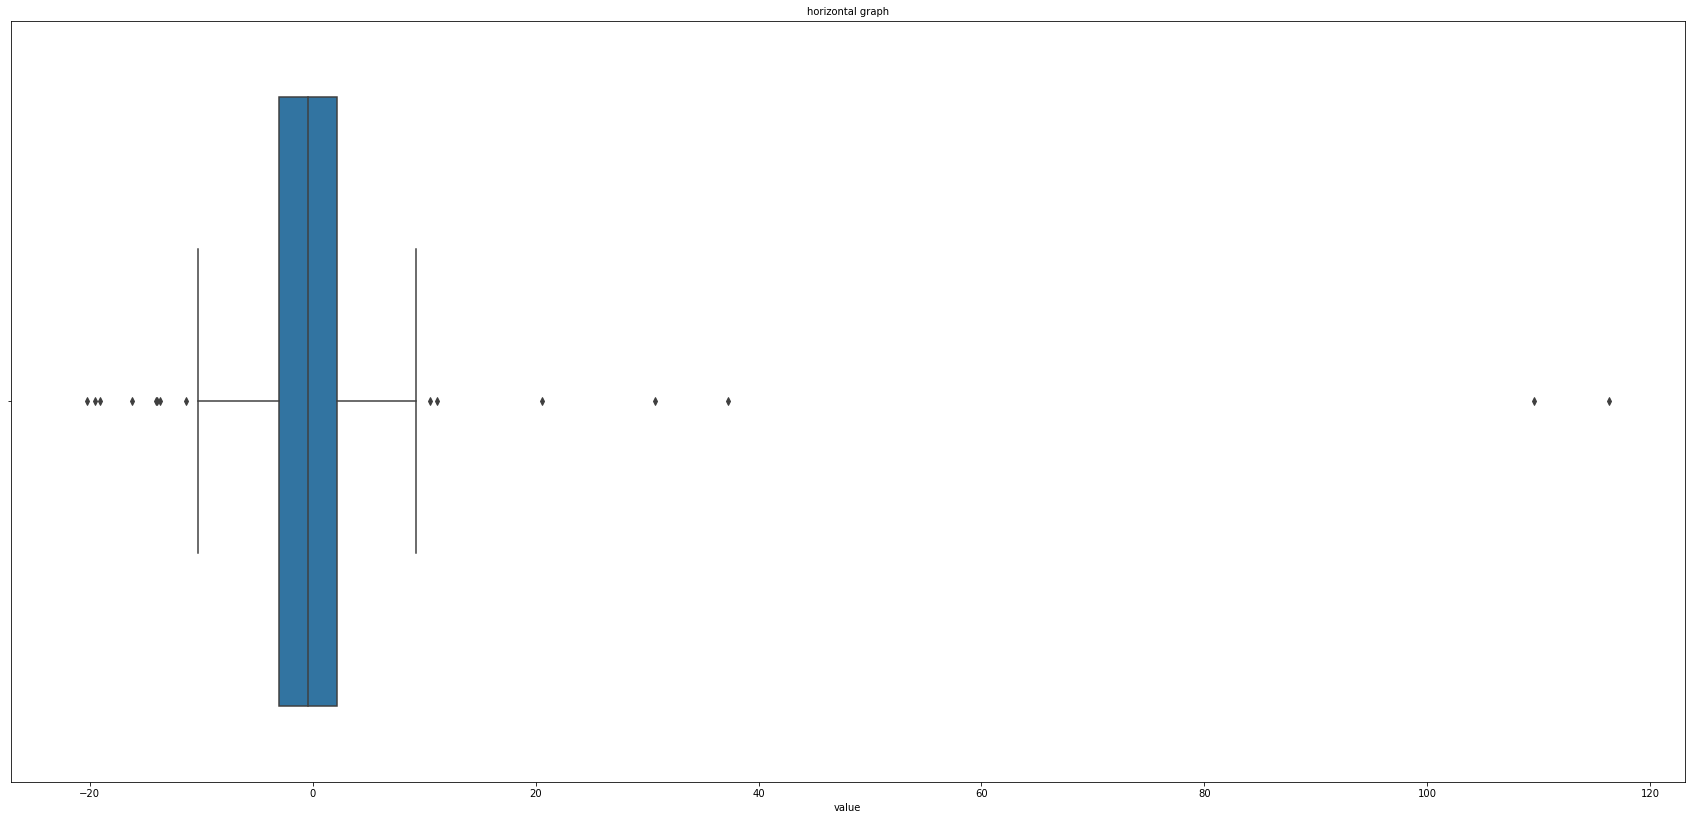

In [68]:
df = eco_norm.loc[:"강남구 청담동"] ## 뒤에서 3번째까지 이상치로 생각하고 제외하고 돌린결과

# 가로 그래프
plt.figure(figsize = (30, 14))
sns.boxplot(x = 'value', data = df)
plt.title('horizontal graph', size = 10)
plt.show()

In [85]:
n = 87
tu = {9:n*1.00, 8:n*0.96, 7:n*0.89, 6:n*0.77, 5:n*0.60, 4:n*0.40, 3:n*0.23, 2:n*0.11,1:n*0.04}
eco_norm["rank"] = ""

for i in tu:
    eco_norm["rank"].iloc[:int(np.floor(tu[i]))] = i
    
eco_norm

,count_bicycle,count_green,count_school,count_top,air_value,ecocar_ratio,one_ratio,value,rank
강서구 화곡8동,-0.744067,-0.656954,-1.089173,-0.731638,1.514015,-0.480749,-0.044863,116.277766,1
송파구 풍납1동,-0.603647,-0.310560,-1.089173,-0.731638,-0.072963,-0.301514,-0.027048,109.566255,1
강서구 화곡2동,-0.884488,-0.830150,-0.360265,-0.731638,1.514015,-0.704227,-0.134850,37.261991,1
동대문구 장안1동,-0.322806,1.075015,0.368643,1.366796,-1.376292,-0.431926,0.111904,30.669392,2
송파구 마천1동,-0.322806,-0.830150,-0.360265,-0.731638,-0.072963,-0.614924,-0.135600,20.551711,2
...,...,...,...,...,...,...,...,...,...
동대문구 답십리1동,-0.463226,1.421409,0.368643,-0.731638,-1.376292,-0.208935,-0.090390,-19.499339,8
강남구 청담동,-0.041965,0.209031,1.097551,0.667318,-0.893984,0.150608,-0.146835,-20.271274,9
금천구 시흥5동,-1.165329,-0.656954,-1.089173,-0.731638,0.614401,-0.597001,0.160796,-30.190408,9
강서구 화곡4동,-1.024908,-0.656954,-0.360265,-0.731638,1.514015,-0.608862,0.074343,-65.865729,9


In [86]:
eco_norm = eco_norm.reset_index()
eco_norm = eco_norm.rename(columns={"index":"gd_nm"})

In [95]:
one_df = one_df.reset_index()
one_g = one_df.drop(columns={"sum_hh","one_ratio","sum_pop","one_hh"})

In [96]:
one_g[one_g["gd_nm"]=="강서구 화곡8동"]

,index,gd_nm,goo_nm,dong_ID,dong_nm,dong_area,cc_value,count_zero,count_market,count_bus,count_station,sum_bus,sum_station,sum_waste,y,x
83,83,강서구 화곡8동,강서구,11500593,화곡8동,0.53,30,0,0,26,0,2835570,0,4928.8,37.550968,126.849614


In [89]:
result = eco_norm.merge(one_g, left_on="gd_nm", right_on="gd_nm", how='outer')
result

,gd_nm,count_bicycle,count_green,count_school,count_top,air_value,ecocar_ratio,one_ratio,value,rank,...,cc_value,count_zero,count_market,count_bus,count_station,sum_bus,sum_station,sum_waste,y,x
0,강서구 화곡8동,-0.744067,-0.656954,-1.089173,-0.731638,1.514015,-0.480749,-0.044863,116.277766,1,...,30,0,0,26,0,2835570,0,4928.8,37.550968,126.849614
1,송파구 풍납1동,-0.603647,-0.310560,-1.089173,-0.731638,-0.072963,-0.301514,-0.027048,109.566255,1,...,0,0,0,6,0,1185664,0,4271.9,37.538055,127.122215
2,강서구 화곡2동,-0.884488,-0.830150,-0.360265,-0.731638,1.514015,-0.704227,-0.134850,37.261991,1,...,30,0,0,29,0,1616393,0,4928.8,37.550968,126.849614
3,동대문구 장안1동,-0.322806,1.075015,0.368643,1.366796,-1.376292,-0.431926,0.111904,30.669392,2,...,10,0,1,28,0,5946183,0,3237.0,37.574428,127.039712
4,송파구 마천1동,-0.322806,-0.830150,-0.360265,-0.731638,-0.072963,-0.614924,-0.135600,20.551711,2,...,10,0,1,14,1,1188135,1395900,4271.9,37.496025,127.149894
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,동대문구 답십리1동,-0.463226,1.421409,0.368643,-0.731638,-1.376292,-0.208935,-0.090390,-19.499339,8,...,0,0,2,25,0,2501030,0,3237.0,37.570970,127.056703
83,강남구 청담동,-0.041965,0.209031,1.097551,0.667318,-0.893984,0.150608,-0.146835,-20.271274,9,...,30,0,3,24,0,6573801,0,5556.9,37.524399,127.050457
84,금천구 시흥5동,-1.165329,-0.656954,-1.089173,-0.731638,0.614401,-0.597001,0.160796,-30.190408,9,...,6,0,0,35,0,4024608,0,3794.8,37.456979,126.895656
85,강서구 화곡4동,-1.024908,-0.656954,-0.360265,-0.731638,1.514015,-0.608862,0.074343,-65.865729,9,...,30,0,1,30,0,1747771,0,4928.8,37.550968,126.849614


In [97]:
result.to_excel("fin_dataset_87_dong.xlsx")